In [9]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#loading the dateset into pandas dataframe (CSV files)
df1 = pd.read_csv('./ML_Internship_2019_Data/CSV 1.csv')
df2 = pd.read_csv('./ML_Internship_2019_Data/CSV 2.csv')
df3 = pd.read_csv('./ML_Internship_2019_Data/CSV 3.csv')

In [11]:
#since all the values in the favouritecount are 0, hence it is useless
df2["favouritecount"].value_counts()

0    900
Name: favouritecount, dtype: int64

In [12]:
#since all the values in the collabprojectscount are 0, hence it is also useless
df3["collabprojectscount"].value_counts()

0    900
Name: collabprojectscount, dtype: int64

In [13]:
#observing the different features in the dataset
df1.T

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
id,2698139,2698093,2698007,2697963,2697938,2697936,2697845,2697825,2697732,2697716,...,7270,7268,7267,7241,7232,7114,6599,5181,3983,2637
city,St Peters,St Louis,Ballwin,Manchester,O'fallon,Wildwood,Monroe City,Bismarck,St Louis,Fenton,...,Miramar,Deerfield Beach,Deerfield Beach,Miami,Miami,Sunny Isles Beach,Miami,North Miami Beach,Sunrise,North Lauderdale
country,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
fullStreetAddress,12 Legacy Estates Lane,222 Euclid Avenue,741 Woodside Trails Drive,301 Wembley Lane,27 Clear Meadows,16779 Hickory Crest Drive,3 Willow Estates Place,438 West Main Street,2140 Nebraska Avenue,1719 Praise,...,12500 W Pembroke Rd,75 SW 2nd Ct,84 SW 1st Ct,733 NW 70th St,2733 NW 56th St,221 188th St,1301 NE Miami Gardens Dr,981 NE 169th St,4668 NW 99th Ave,8140 SW 24th St
postalCode,63376,63119,63021,63021,63366,63011,63456,63624,63104,63026,...,33027,33441,33441,33150,33142,33160,33179,33162,33351,33068
stateOrProvince,MO,MO,MO,MO,MO,MO,MO,MO,MO,MO,...,FL,FL,FL,FL,FL,FL,FL,FL,FL,FL
unitNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,413W,114,NaN,311
bathrooms,6,2,3,2,4,3,1,1,4,3,...,0,0,0,0,0,2,2,1,3,2
bedrooms,5,3,3,3,4,4,2,3,4,3,...,0,0,0,0,0,3,1,1,3,2
listingDescription,Tucked away in the private Legacy Estates subd...,This charming Ranch offers hardwood flooring o...,This is the LARGEST Villa-style condo in this ...,Over 1700 sq ft of updated living space in con...,"Move in ready, excellent condition. Outstandin...",Beautiful Hickory Manor home just hit the mark...,Great opportunity to own property close to MAR...,"ADORABLE, EDGE OF TOWN, BRICK RANCH! 1/2 acre...",Welcome home to this very contemporary and his...,Open House Sun. 2/17 1-3. All offers will be r...,...,large 3 acre parcel on busy Pembroke Rd.,Great lot to build your dream home or a duplex...,Great lot to build your dream home or a duplex...,Great lot to build your dream home or a duplex...,Great lot to build your dream home or a duplex...,"Lowest Priced Home in Golden Shores! Location,...",****** Upgraded & conveniently located Apartm...,Great 1 bedroom 1 bathroom condo. Currently re...,Motivated Seller!! New Roof Jan 2018 and warra...,"Built-in care and style in this condo, made fo..."


In [14]:
#getting the number of nan values in each feature
df1.isnull().sum()

id                         0
city                       0
country                    0
fullStreetAddress          0
postalCode                 0
stateOrProvince            1
unitNumber               782
bathrooms                  0
bedrooms                   0
listingDescription        58
listingTitle               0
latitude                 111
longitude                111
listPrice                  0
livingArea               174
livingAreaUnit             0
yearBuilt                109
lotSize                  338
lotSizeUnit                0
propertySubType            0
listingCategory            0
numParkingSpaces         440
createdAt                  0
geocodioAccuracyScore    873
photoscount                0
grade                      0
dtype: int64

In [15]:
#checking the number of unique values present for each feature
df1.nunique()

id                       900
city                     620
country                    3
fullStreetAddress        893
postalCode               778
stateOrProvince           51
unitNumber               105
bathrooms                 12
bedrooms                  10
listingDescription       817
listingTitle             772
latitude                 776
longitude                774
listPrice                536
livingArea               548
livingAreaUnit             1
yearBuilt                116
lotSize                  277
lotSizeUnit                1
propertySubType           14
listingCategory            2
numParkingSpaces          11
createdAt                900
geocodioAccuracyScore      4
photoscount               61
grade                      3
dtype: int64

In [16]:
# dropping unitNumber and geocodioAccuracyScore since there are lots of null values
df1 = df1.drop(["unitNumber", "geocodioAccuracyScore"], axis=1)
# dropping listingDescription and listingTitle since they are in form of text and would not be very useful to the algorithm
df1 = df1.drop(["listingDescription", "listingTitle", "fullStreetAddress"], axis=1)
# dropping livingAreaUnit and lotSizeUnit since it is same for all
df1 = df1.drop(["livingAreaUnit", "lotSizeUnit"], axis=1)
# dropping id and createdAt since they does not affect the grade of the house
df1 = df1.drop(["id","createdAt"], axis=1)
# dropping latitude, longitude, postalCode and stateOrProvince since we are using the city feature to factor in the location of house
df1 = df1.drop(["latitude","longitude", "postalCode", "stateOrProvince"], axis=1)

In [17]:
# getting info about the values and their datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 13 columns):
city                900 non-null object
country             900 non-null object
bathrooms           900 non-null int64
bedrooms            900 non-null int64
listPrice           900 non-null float64
livingArea          726 non-null float64
yearBuilt           791 non-null float64
lotSize             562 non-null float64
propertySubType     900 non-null object
listingCategory     900 non-null object
numParkingSpaces    460 non-null float64
photoscount         900 non-null int64
grade               900 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 91.5+ KB


In [18]:
#filling up the nan values with mean
df1['livingArea'].fillna(df1['livingArea'].mean(), inplace=True)
df1['yearBuilt'].fillna(int(df1['yearBuilt'].mean()), inplace=True)
df1['lotSize'].fillna(df1['lotSize'].mean(), inplace=True)
df1['numParkingSpaces'].fillna(int(df1['numParkingSpaces'].mean()), inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#label encoding the categorical features
country_encoder = LabelEncoder()
df1['country'] = country_encoder.fit_transform(df1['country'])

property_encoder = LabelEncoder()
df1['propertySubType'] = property_encoder.fit_transform(df1['propertySubType'])

listing_encoder = LabelEncoder()
df1['listingCategory'] = listing_encoder.fit_transform(df1['listingCategory'])

In [21]:
#converting the grade feature into numerical values
df1['grade'][df1['grade']=='awesome'] = 1
df1['grade'][df1['grade']=='good'] = 3
df1['grade'][df1['grade']=='bad'] = 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
#preparing data for label encoding the city feature 
df1["city"] = df1["city"].str.lower()
cities = df1.groupby(['city','grade']).count()
m = df1["city"].unique()

In [23]:
"""
label encoding the city feature
label:meaning
7:city contains all grade houses
6:city contains awesome and bad grade houses
5:city contains good and bad grade houses
4:city contains awesome and good grade houses
3:city contains only bad grade houses
2:city contains only good grade houses
1:city contains only awesome grade houses
"""
dic = {}
for i in m:
    q = cities.loc[i].index.values.sum()
    if q==9:
        dic[i] = 7
    elif q==6:
        dic[i] = 6
    elif q==8:
        dic[i] = 5
    elif q==4:
        dic[i] = 4
    elif q==5:
        dic[i] = 3
    elif q==3:
        dic[i] = 2
    elif q==1:
        dic[i] = 1
df1 = df1.replace({"city": dic})

In [25]:
df1.head()

,city,country,bathrooms,bedrooms,listPrice,livingArea,yearBuilt,lotSize,propertySubType,listingCategory,numParkingSpaces,photoscount,grade
0,1,2,6,5,425000.0,3046.0,1998.0,122417.000783,9,0,3.0,29,1
1,4,2,2,3,175000.0,1587.0,1962.0,7753.680000,9,0,1.0,29,1
2,1,2,3,3,295000.0,2437.0,1986.0,14766.840000,1,0,2.0,29,1
3,6,2,2,3,215000.0,1780.0,1969.0,11848.320000,9,0,2.0,29,1
4,4,2,4,4,375000.0,3405.0,2007.0,10890.000000,9,0,3.0,29,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
"""
converting the grade feature into numerical values
1:awesome
2:good
3:bad
"""
df1['grade'][df1['grade']==3] = 2
df1['grade'][df1['grade']==5] = 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# splitting the data into features and labels
x = df1.drop(['grade'], axis=1)
y = df1['grade']

In [29]:
#standardizing the values
scaler = StandardScaler()
x = scaler.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
#spliting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y.values,test_size=0.15,stratify=y)
y_train, y_test = y_train.astype('int'), y_test.astype('int')
print(x_train.shape,x_test.shape)

(765, 12) (135, 12)


In [60]:
#importing the classification models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
model_scores = {}

In [61]:
logistic_model = LogisticRegression(multi_class='auto',solver='lbfgs')
logistic_model.fit(x_train,y_train)
model_scores["logistic_model"] = logistic_model.score(x_test,y_test)
print(model_scores["logistic_model"])

0.9185185185185185


In [62]:
sv_model = SVC(gamma='scale')
sv_model.fit(x_train,y_train)
model_scores["sv_model"] = sv_model.score(x_test,y_test)
print(model_scores["sv_model"])

0.8962962962962963


In [63]:
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(x_train,y_train)
model_scores["ada_model"] = ada_model.score(x_test,y_test)
print(model_scores["ada_model"])

0.9703703703703703


In [64]:
forest_model = RandomForestClassifier(n_estimators=120)
forest_model.fit(x_train,y_train)
model_scores["forest_model"] = forest_model.score(x_test,y_test)
print(model_scores["forest_model"])

0.9629629629629629


In [65]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
model_scores["tree_model"] = tree_model.score(x_test,y_test)
print(model_scores["tree_model"])

0.9333333333333333


In [66]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
model_scores["knn_model"] = knn_model.score(x_test,y_test)
print(model_scores["knn_model"])

0.8814814814814815


In [67]:
nn_model = MLPClassifier(hidden_layer_sizes=(16,10,8), max_iter=300)
nn_model.fit(x_train,y_train)
model_scores["nn_model"] = nn_model.score(x_test,y_test)
print(model_scores["nn_model"])

0.9703703703703703


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<BarContainer object of 7 artists>

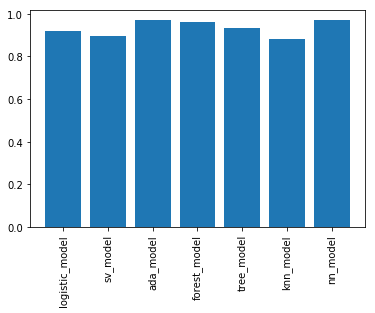

In [68]:
plt.xticks(rotation=90)
plt.bar(model_scores.keys(),model_scores.values())